Solution to Resturant Reviews - Dataset C

In [ ]:
import nltk
import re
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy import displacy
from spacy import tokenizer

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

**Reading CSV**

In [ ]:
df = pd.read_csv("assignment_dataset_C.csv", encoding='cp1252')
"""without defining the encoding, there is an error that occurs about utf-8 encoding"""
df.head(5)

,Reviewer,ReviewTxt
0,1,Wow... Loved this place.
1,2,Crust is not good.
2,3,Not tasty and the texture was just nasty.
3,4,Stopped by during the late May bank holiday of...
4,5,The selection on the menu was great and so wer...


**Question 1 : Removing Stop Words and creating new column which doesn't contain stop words**

In [ ]:
stop_words = stopwords.words('english')
#print(stop_words)

df['ReviewTxt']=df['ReviewTxt'].astype(str) ## converting any values to string type
def stop_remove(a):
  words = word_tokenize(a)
  filtered_sentence = [w for w in words if not w.lower() in stop_words]
  return filtered_sentence

df_newcol = df['ReviewTxt'].apply(stop_remove)
df['filtered_sentence']=df_newcol
df

,Reviewer,ReviewTxt,filtered_sentence
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]"
1,2,Crust is not good.,"[Crust, good, .]"
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]"
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev..."
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]"
...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]"
96,97,Soggy and not good.,"[Soggy, good, .]"
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]"
98,99,Which are small and not worth the price.,"[small, worth, price, .]"


In [ ]:
def remove_stopword(k):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(k)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return ' '.join(filtered_sentence)

df['ReviewTxt_stopwords'] = df['ReviewTxt'].apply(remove_stopword)
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .
1,2,Crust is not good.,"[Crust, good, .]",Crust good .
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .
...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .


**Question 2 : Masking the Order ID using Regex**

In [ ]:
## Creating a new column "masked_order" where the ORDER ID has been masked

def regmatch(a):
  tokenizer = RegexpTokenizer(r'\w+')
  words_revtxt = tokenizer.tokenize(a)
  dt_mt = [re.sub('[ORD#][0-9]{3}[-][0-9]{6}', 'ORDER-xyz', _) for _ in words_revtxt]
  #dt_mt = re.search('[ORD#][0-9]{3}[-][0-9]{6}',a)
  if dt_mt != None:
    return dt_mt
  else:
    return None

df_new2 = df['ReviewTxt'].apply(regmatch)

df['masked_order']=df_new2
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]"
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]"
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]"
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho..."
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an..."
...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]"
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]"
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]"
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]"


In [ ]:
## Creating a new column "masked_order_val" where the masked ORDER ID value has been appended

def regmatch(a):
  dt_mt = re.search('[ORD#][0-9]{3}[-][0-9]{6}',a)
  if dt_mt != None:
    return "ORDER-xyz"
  else:
    return None

df_new2 = df['ReviewTxt'].apply(regmatch)

df['masked_order_val']=df_new2
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order,masked_order_val
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]",None
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]",None
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]",None
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho...",None
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an...",None
...,...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]",None
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]",None
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]",None
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]",None


In [ ]:
## Testing the column if the masked values have been appended

df.loc[10,['masked_order_val']], df.loc[11,['masked_order_val']]

(masked_order_val    ORDER-xyz
 Name: 10, dtype: object, masked_order_val    None
 Name: 11, dtype: object)

**Question 3 : Finding the Sentiment score and giving a rating**

In [ ]:
## Appending the sentiment into a new column

df['ReviewTxt']=df['ReviewTxt'].astype(str) ## converting any values to string type
sentim = SentimentIntensityAnalyzer()
def sentiment(a):
  scoring = sentim.polarity_scores(a)
  if scoring['compound']>0:
    return 'Positive'
  elif scoring['compound']==0:
    return 'Neutral'
  else:
    return 'Negative'

df_newcol2 = df['ReviewTxt'].apply(sentiment)
df['sentiment_SIA']=df_newcol2
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order,masked_order_val,sentiment_SIA
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]",None,Positive
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]",None,Negative
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]",None,Negative
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho...",None,Positive
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an...",None,Positive
...,...,...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]",None,Positive
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]",None,Negative
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]",None,Positive
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]",None,Negative


In [ ]:
df['sentiment_SIA'].value_counts()

Positive    59
Negative    26
Neutral     15
Name: sentiment_SIA, dtype: int64

In [ ]:
## Appending sentiment scores into a new column

df['ReviewTxt']=df['ReviewTxt'].astype(str) ## converting any values to string type
sentim = SentimentIntensityAnalyzer()
def sentiment(a):
  scoring = sentim.polarity_scores(a)
  return scoring['compound']

df_newcol2 = df['ReviewTxt'].apply(sentiment)
df['sentiment_score_SIA']=df_newcol2
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order,masked_order_val,sentiment_SIA,sentiment_score_SIA
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]",None,Positive,0.5994
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]",None,Negative,-0.3412
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]",None,Negative,-0.5574
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho...",None,Positive,0.6908
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an...",None,Positive,0.6249
...,...,...,...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]",None,Positive,0.4926
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]",None,Negative,-0.3412
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]",None,Positive,0.5719
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]",None,Negative,-0.1695


In [ ]:
## Creating Bins and Appending Ratings into a new column

df['ReviewTxt']=df['ReviewTxt'].astype(str) ## converting any values to string type
sentim = SentimentIntensityAnalyzer()
def sentiment(a):
  scoring = sentim.polarity_scores(a)
  if scoring['compound']>0.75:
    return 5
  elif scoring['compound']>0.45 and scoring['compound']<=0.75:
    return 4
  elif scoring['compound']>0 and scoring['compound']<=0.45:
    return 3
  elif scoring['compound']<0 and scoring['compound']>=-0.45:
    return 2
  elif scoring['compound']<-0.45 and scoring['compound']>=-0.75:
    return 1
  else:
    return 0

df_newcol2 = df['ReviewTxt'].apply(sentiment)
df['rating_SIA']=df_newcol2
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order,masked_order_val,sentiment_SIA,sentiment_score_SIA,rating_SIA
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]",None,Positive,0.5994,4
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]",None,Negative,-0.3412,2
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]",None,Negative,-0.5574,1
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho...",None,Positive,0.6908,4
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an...",None,Positive,0.6249,4
...,...,...,...,...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]",None,Positive,0.4926,4
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]",None,Negative,-0.3412,2
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]",None,Positive,0.5719,4
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]",None,Negative,-0.1695,2


In [ ]:
df['rating_SIA'].value_counts()

4    31
0    19
3    18
1    16
5    10
2     6
Name: rating_SIA, dtype: int64

**Question 4 : Finding the overall rating of all reviews**

In [ ]:
overall_rating = df['rating_SIA'].mean()
print("Overall rating: ", overall_rating)

Overall rating:  2.56


**Question 5 & 6 : Finding the Top Selling and Most Hated Food**

In [ ]:
df

,Reviewer,ReviewTxt,filtered_sentence,ReviewTxt_stopwords,masked_order,masked_order_val,sentiment_SIA,sentiment_score_SIA,rating_SIA
0,1,Wow... Loved this place.,"[Wow, ..., Loved, place, .]",Wow ... Loved place .,"[Wow, Loved, this, place]",None,Positive,0.5994,4
1,2,Crust is not good.,"[Crust, good, .]",Crust good .,"[Crust, is, not, good]",None,Negative,-0.3412,2
2,3,Not tasty and the texture was just nasty.,"[tasty, texture, nasty, .]",tasty texture nasty .,"[Not, tasty, and, the, texture, was, just, nasty]",None,Negative,-0.5574,1
3,4,Stopped by during the late May bank holiday of...,"[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...,"[Stopped, by, during, the, late, May, bank, ho...",None,Positive,0.6908,4
4,5,The selection on the menu was great and so wer...,"[selection, menu, great, prices, .]",selection menu great prices .,"[The, selection, on, the, menu, was, great, an...",None,Positive,0.6249,4
...,...,...,...,...,...,...,...,...,...
95,96,Waitress was good though!,"[Waitress, good, though, !]",Waitress good though !,"[Waitress, was, good, though]",None,Positive,0.4926,4
96,97,Soggy and not good.,"[Soggy, good, .]",Soggy good .,"[Soggy, and, not, good]",None,Negative,-0.3412,2
97,98,The Jamaican mojitos are delicious.,"[Jamaican, mojitos, delicious, .]",Jamaican mojitos delicious .,"[The, Jamaican, mojitos, are, delicious]",None,Positive,0.5719,4
98,99,Which are small and not worth the price.,"[small, worth, price, .]",small worth price .,"[Which, are, small, and, not, worth, the, price]",None,Negative,-0.1695,2


In [ ]:
## Creating dataframes based on Ratings for reviews for top selling and most hated

df_top = df.loc[(df['rating_SIA'] >= 3), ['ReviewTxt_stopwords','rating_SIA']]
df_hated = df.loc[(df['rating_SIA'] <= 2), ['ReviewTxt_stopwords','rating_SIA']]
df_top, df_hated

(                                  ReviewTxt_stopwords  rating_SIA
 0                               Wow ... Loved place .           4
 3   Stopped late May bank holiday Rick Steve recom...           4
 4                       selection menu great prices .           4
 6        Punjabi resturant , Paneer Kadai best Pune .           4
 7   ordered Zomato ORD # 176-678765 . delivery slo...           5
 8   resturant recommended friend . multiple branch...           5
 9   never heard resturant . Zomato recommended Pan...           5
 11  resturant amazing , food especially roti makha...           4
 13  potatoes like rubber could tell made ahead tim...           4
 14                                      fries great .           4
 15                                      great touch .           4
 18  cashier care ever say still ended wayyy overpr...           3
 20                 disgusted pretty sure human hair .           3
 22                               Highly recommended .        

In [ ]:
best_reviews = (df[df['rating_SIA']>=3])
worst_reviews = (df[df['rating_SIA']<=2])

In [ ]:
top_selling = ' '.join(best_reviews['ReviewTxt_stopwords'])
most_hated = ' '.join(worst_reviews['ReviewTxt_stopwords'])
top_selling

"Wow ... Loved place . Stopped late May bank holiday Rick Steve recommendation loved . selection menu great prices . Punjabi resturant , Paneer Kadai best Pune . ordered Zomato ORD # 176-678765 . delivery slow food incredible . loved indian food rates also good . resturant recommended friend . multiple branches Pune . None branches good parking . ’ offer valet parking never heard resturant . Zomato recommended Paneer Kadai incredible . would definitely love order . resturant amazing , food especially roti makhan Paneer Kadai potatoes like rubber could tell made ahead time kept warmer . fries great . great touch . cashier care ever say still ended wayyy overpriced . disgusted pretty sure human hair . Highly recommended . went wife resturant . Paneer Kadai best None branches good parking . ’ offer valet parking never heard resturant . Zomato recommended Paneer Kadai incredible . would definitely love order . resturant amazing , food especially roti makhan Paneer Kadai hole wall great Gar

In [ ]:
bagOfWords_top = top_selling.split(' ')
bagOfWords_hated = most_hated.split(' ')
uniqueWords = set(bagOfWords_top).union(set(bagOfWords_hated))

numOfWords_top = dict.fromkeys(uniqueWords, 0)
for word in bagOfWords_top:
    numOfWords_top[word] += 1
numOfWords_hated = dict.fromkeys(uniqueWords, 0)
for word in bagOfWords_hated:
    numOfWords_hated[word] += 1

In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

tf_top = computeTF(numOfWords_top, bagOfWords_top)
tf_hated = computeTF(numOfWords_hated, bagOfWords_hated)

tf_top, tf_hated

({'!': 0.03160270880361174,
  '#': 0.002257336343115124,
  "'ll": 0.002257336343115124,
  "'s": 0.002257336343115124,
  "'ve": 0.0,
  ')': 0.0,
  ',': 0.04288939051918736,
  '.': 0.09706546275395034,
  '...': 0.004514672686230248,
  '123-761234': 0.0,
  '132-676543': 0.0,
  '176-678765': 0.002257336343115124,
  '187-709843': 0.0,
  '187-788543': 0.0,
  '23': 0.002257336343115124,
  '4': 0.002257336343115124,
  '5/5': 0.0,
  '?': 0.0,
  'Also': 0.002257336343115124,
  'Amazing': 0.002257336343115124,
  'Ample': 0.002257336343115124,
  'Avoid': 0.0,
  'Bacon': 0.0,
  'Best': 0.002257336343115124,
  'Biryani': 0.004514672686230248,
  'Buffet': 0.002257336343115124,
  'Cape': 0.0,
  'Chinese': 0.0,
  'Cod': 0.0,
  'Crispy': 0.004514672686230248,
  'Crust': 0.0,
  'DELICIOUS': 0.002257336343115124,
  'Everything': 0.002257336343115124,
  'Extremely': 0.0,
  'Firehouse': 0.002257336343115124,
  'Food': 0.0,
  'Frozen': 0.0,
  'Garlic': 0.002257336343115124,
  'Hard': 0.0,
  'Highly': 0.00225

In [ ]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

idfs = computeIDF([numOfWords_top, numOfWords_hated])

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

tfidf_top = computeTFIDF(tf_top, idfs)
tfidf_hated = computeTFIDF(tf_hated, idfs)

top_hated_df = pd.DataFrame([tfidf_top, tfidf_hated])

In [ ]:
top_selling = top_hated_df.max(axis=1)
top_selling

0    0.023470
1    0.011709
dtype: float64

In [ ]:
top_hated_df.idxmax(axis=1)

0      Paneer
1    horrible
dtype: object

In [ ]:
print("Top : ", top_hated_df.idxmax(axis=1)[0])
print("Hated : ", top_hated_df.idxmax(axis=1)[1])

Top :  Paneer
Hated :  horrible


There are 825 words in the combination of all review.


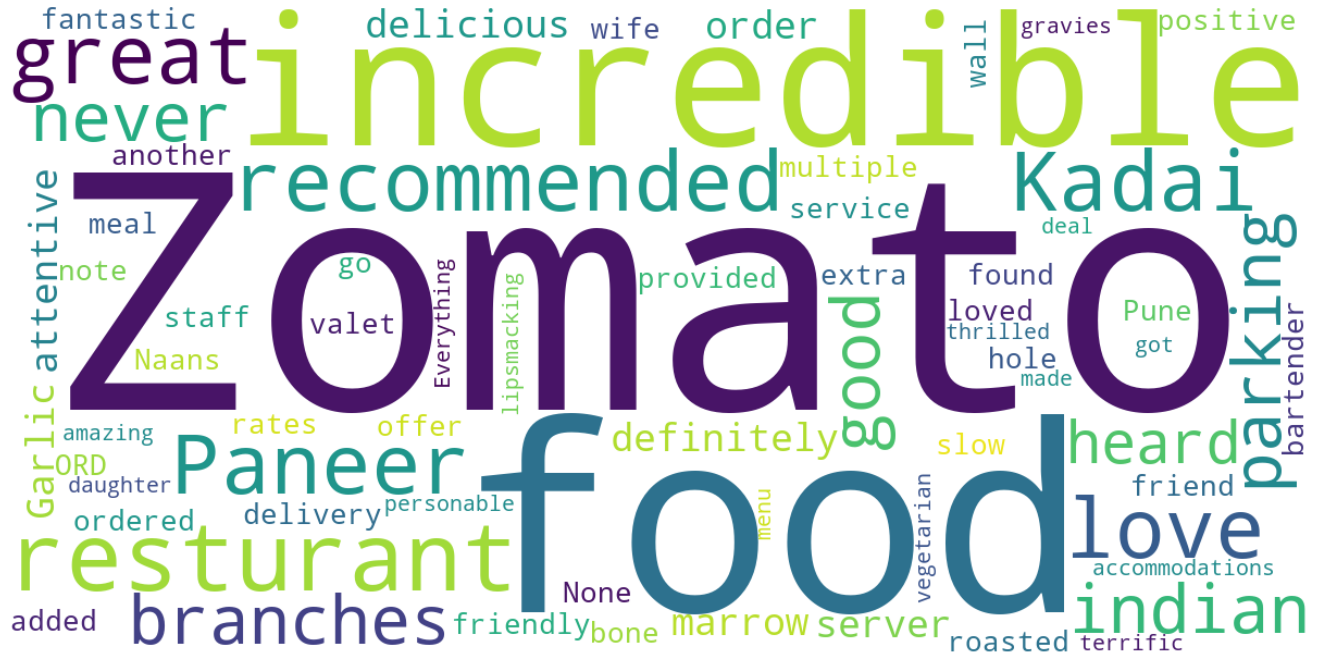

In [ ]:
## BEST SELLING --> Biggest word in wordcloud is "Paneer"

from wordcloud import WordCloud
import matplotlib.pyplot as plt


Top_Selling_Df = df[df['rating_SIA'] ==5] #Creating DataFrame for Review Rating ==5
text = " ".join(review for review in Top_Selling_Df['ReviewTxt_stopwords'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image for Best Reviews 
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 773 words in the combination of all review.


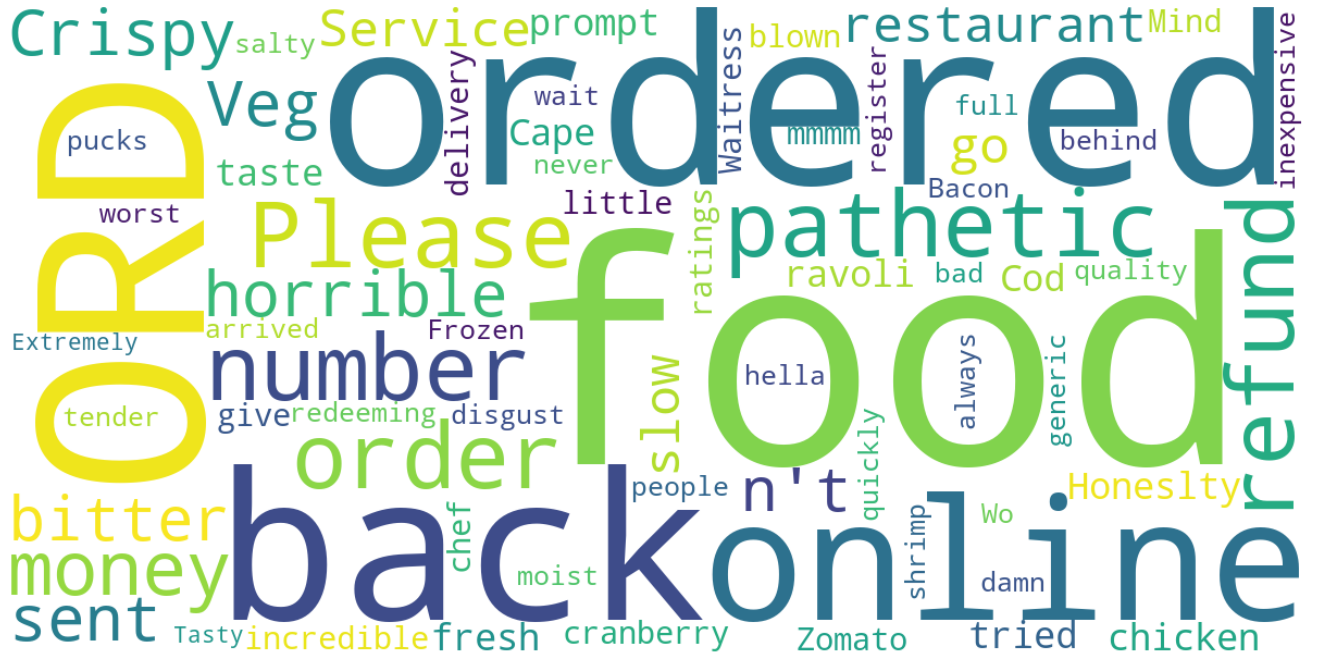

In [ ]:
## TOP HATED --> Biggest word in wordcloud is "Veg"

from wordcloud import WordCloud
import matplotlib.pyplot as plt


Top_Selling_Df = df[df['rating_SIA'] == 0] #Creating DataFrame for Review Rating == 0
text = " ".join(review for review in Top_Selling_Df['ReviewTxt_stopwords'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image for Best Reviews 
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()